In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [ ]:
from __future__ import print_function
import os
import re
import nltk
import spacy
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from spacy import displacy
from collections import Counter
import en_core_web_sm
from pprint import pprint

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (53.1 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1

In [ ]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

     | 165.2MB 2.9MB/s
     |████████████████████████████████| 10.4MB 2.6MB/s 
     |████████████████████████████████| 225kB 33.5MB/s 
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756021 sha256=e8e43ed0592dee5da15eb1a8d0a7787afae760446b3fd2177758ffa539226749
  Stored in directory: /tmp/pip-ephem-wheel-cache-bhj7f6y8/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=ff3f36f35ad3848547bc4413baaaf6534819c7ba863a8c2b1b6cdbc032a8aca8
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built basemap pyshp


In [ ]:
from mpl_toolkits.basemap import Basemap

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
cd NLP_dataset/    #Folder where the dataset is downloaded

/content/drive/My Drive/NLP_dataset


In [ ]:
judges = open('names.txt', 'w+')

for filename in os.listdir('Judgement'):
    if filename.endswith('.txt'):
        with open(os.path.join('Judgement', filename)) as f:
            content = f.read()
            content1 = content.replace('-', '')
            content2 = content1.replace(' -', '')
            content3 = content2.replace('- ', '')
            #content4 = content3.replace('.', '\n')
            content__ = nltk.tokenize.sent_tokenize(content3)
            for line in content__:
              
              if line.startswith("The Judgment of the Court was delivered by"):
                judges.write(line + '\n')
              elif line.startswith("The judgment of the Court was delivered by"):
                judges.write(line + '\n')


In [ ]:
sep = '.'

with open("names.txt") as file_in:
    lines = []
    file_out = open("only_names.txt", "w+")
    for line in file_in:
        res = line.split(sep, 1)[0]
        res1 = res.replace(' J', '') 
        res2 = res1.replace('Theudgment', 'The judgment')
        res3 = res2.lower()
        file_out.write(res3 + '\n')


In [ ]:
spacy_nlp = spacy.load('en')


In [ ]:
with open("only_names.txt") as file:
  ner_names = file.read()


In [ ]:
document = spacy_nlp(ner_names)
only_names_judges = []
no_of_cases = 0

for element in document.ents:

    if element.label_ == "WORK_OF_ART" :
      print("not taking work of art")
    elif element.label_ == "DATE" :
      print("not taking dates")
    elif element.label_ == "LOC" :
      print("not takoing LOC also")
    elif element.label_ == "LAW" :
      print("not takoing LAW also")
    elif element.label_ == "CARDINAL" :
      print("not taking numbers")
    elif element.label_ == "FAC" :
      print("not taking FAC")
    elif element.label_ == "EVENT":
      print("not takoing event also")
    elif element.label_ == "PRODUCT":
      print("not takoing produc also")
    elif element.label_ == "PERCENT":
      print("not taking percent also")
    elif element.label_ == "MONEY":
      print("not takoing money also")
    elif element.label_ == "QUANTITY":
      print("not takoing quantity also")
    elif element.label_ == "ORDINAL":
      print("not taking ordinal also")
    else:
      if element.text == 'Court':
        print("nnp")
      else:
        only_names_judges.append(element.text)


In [ ]:
i = 0
for w in only_names_judges:
  w = w.replace('\n', '')
  w = w.strip()
  only_names_judges[i] = w
  i = i+1

In [ ]:
#only_names_judges
def unique(list1): 
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list

In [ ]:
wordfreq = []
i=0
for w in only_names_judges:
    w = w.upper()
    only_names_judges[i] = w
    i = i+1
    wordfreq.append(only_names_judges.count(w))


In [ ]:
dictionary = dict(zip(only_names_judges,wordfreq))

In [ ]:
for name in list(dictionary.keys()):
    matches = re.findall('[0-9]', name)
    if len(matches) >= 1:
      del dictionary[name]

In [ ]:
dictionary = {key:val for key, val in dictionary.items() if val != 1}

In [ ]:
names = dictionary.keys() 
cases = dictionary.values() 

In [ ]:
def plot_bar_x():
    # this is for plotting purpose
    plt.figure(figsize=(50, 50))
    index = np.arange(len(names))
    plt.bar(index, cases)
    plt.xlabel('Names', fontsize=5)
    plt.ylabel('No of cases', fontsize=5)
    plt.xticks(index, names, fontsize=5, rotation=30)
    plt.title('Supreme Court Judges')
    plt.show()

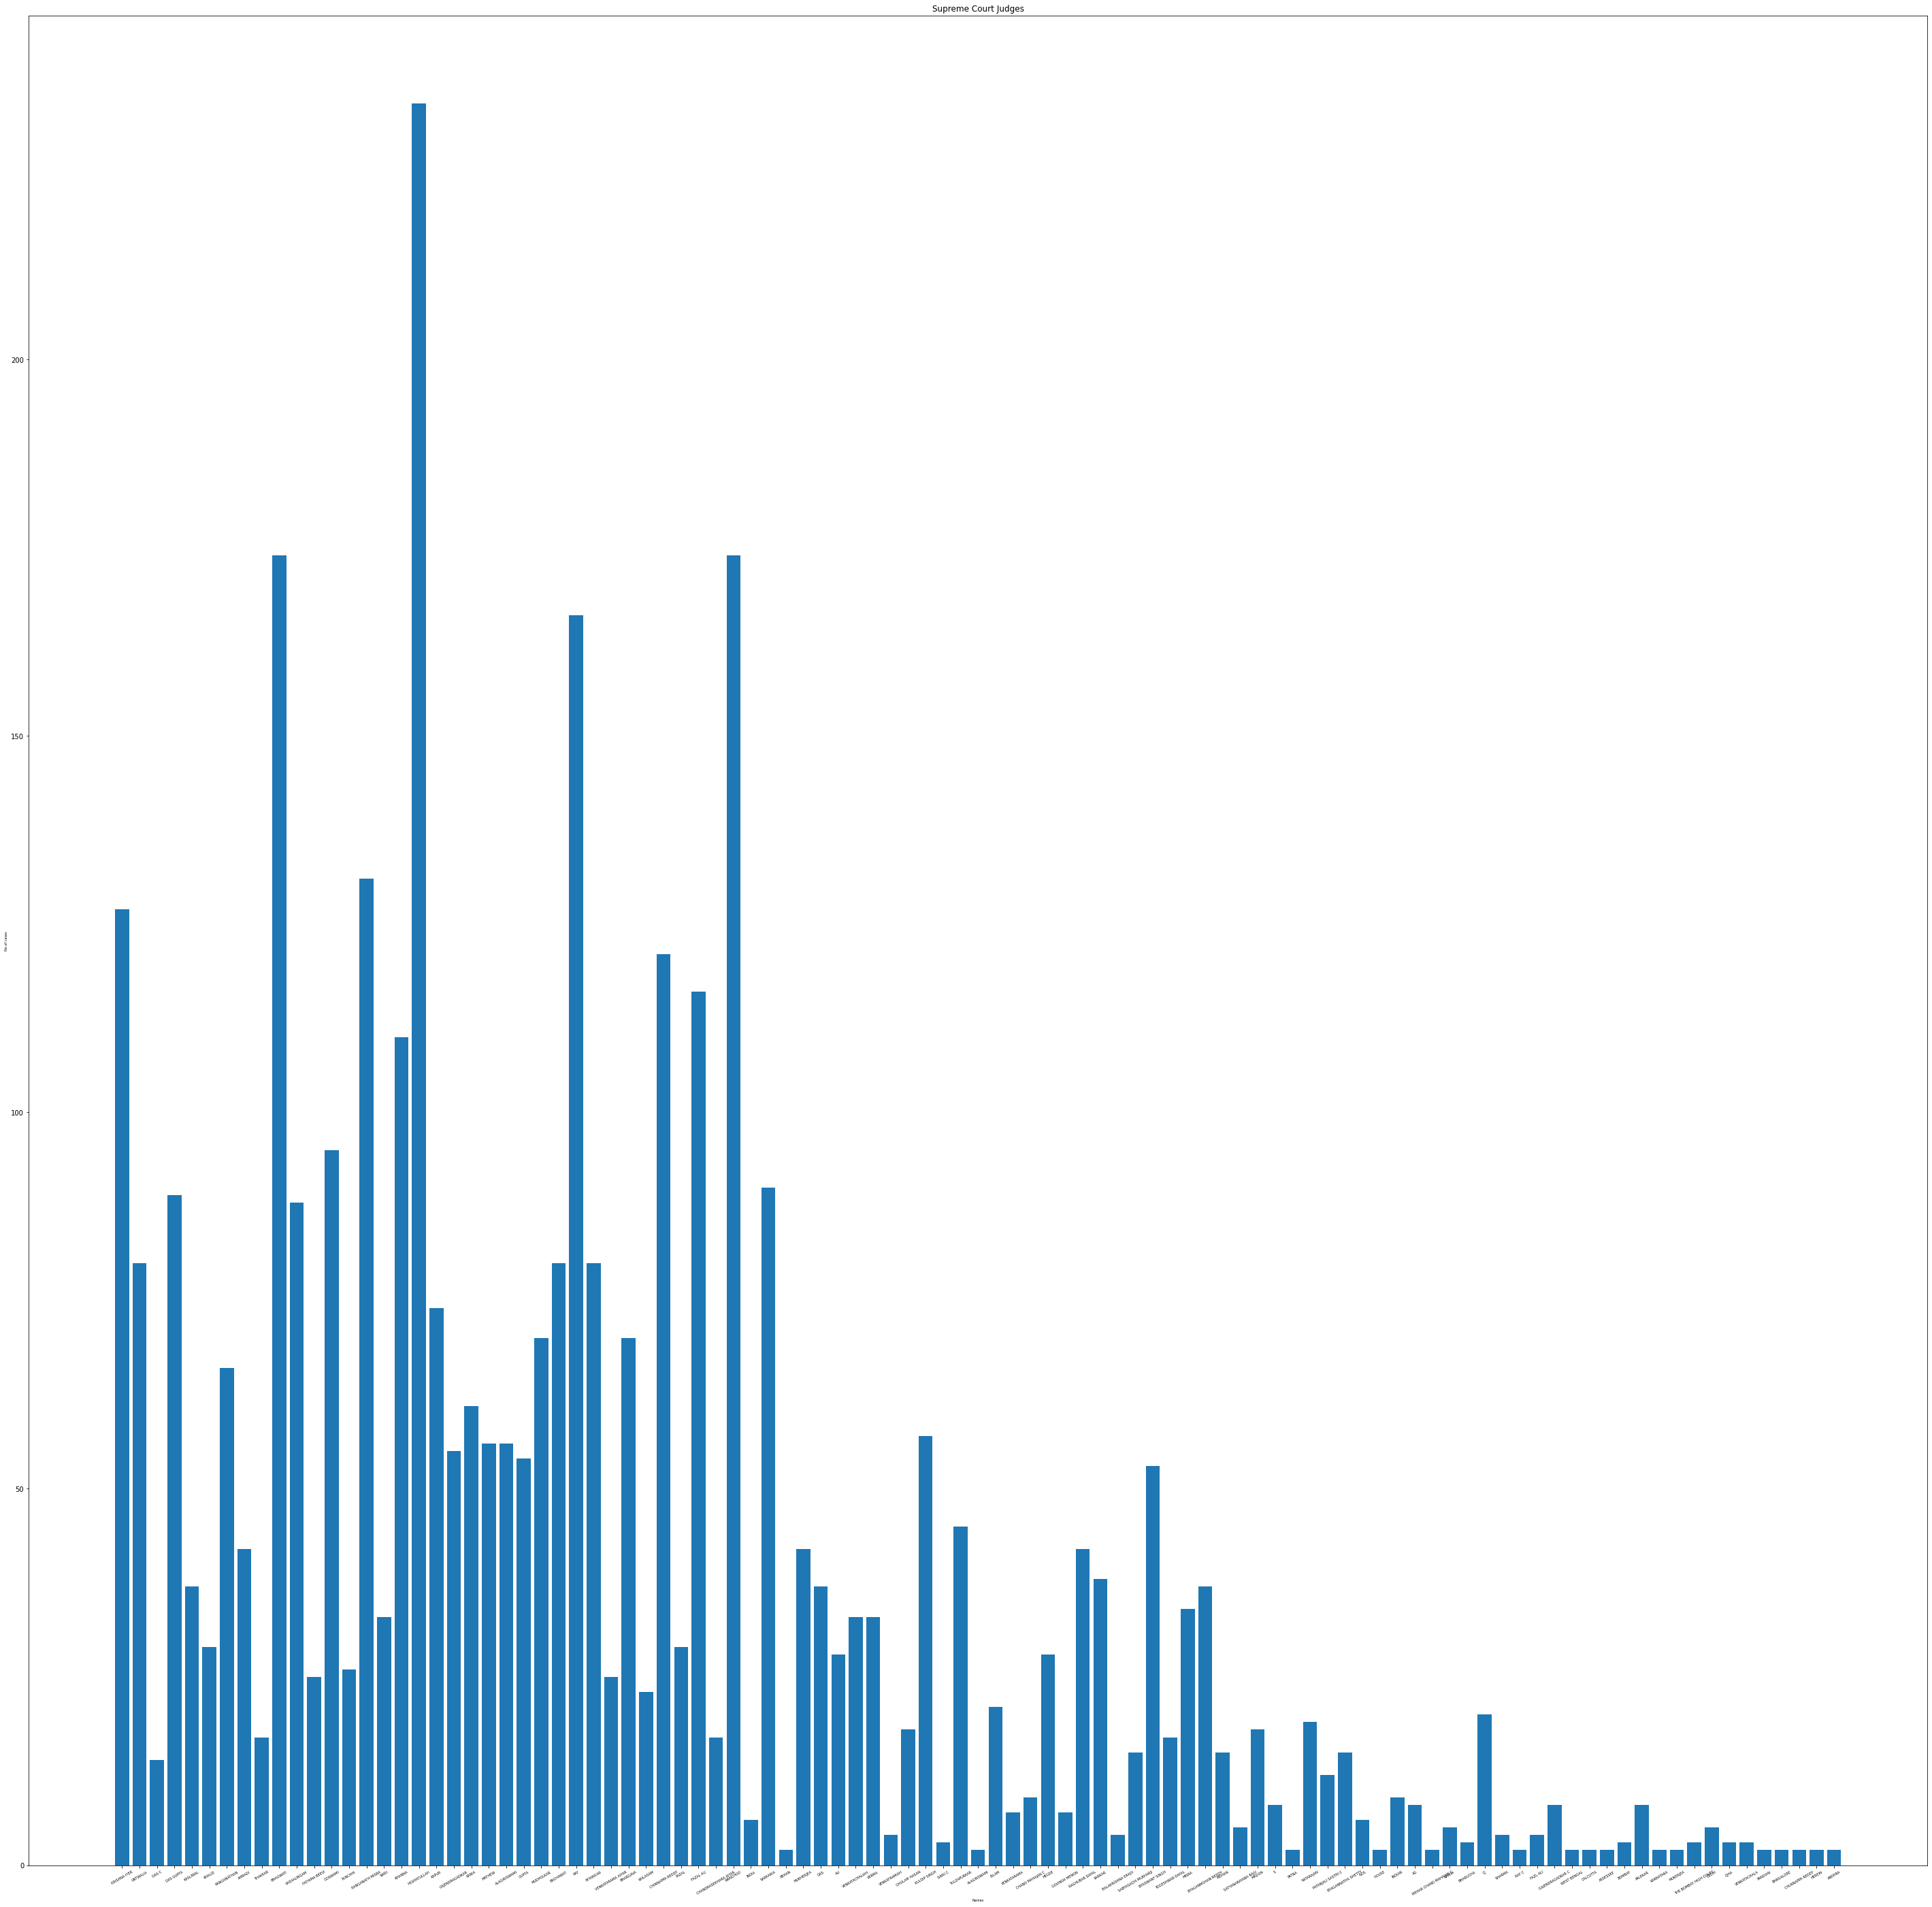

In [ ]:
plot_bar_x()

Annotating in the dataset itself 

In [ ]:
for filename in os.listdir('Judgement'):
    if filename.endswith('.txt'):
        file_ = os.path.join('Judgement', filename)
        with open(file_, 'r') as f:
            content = f.read()
            content1 = content.replace('-', "")
            content2 = content1.replace(' -', "")
            content3 = content2.replace('- ', "")
            content4 = content3.replace('.J', ". ")
            content5 = content4.replace('J.', ". ")
            content6 = content5.replace('--', "")
            content7 = content6.replace(' .', ". ")
            content__ = nltk.tokenize.sent_tokenize(content7)
            new_file_content = ""
            for line in content__:
              
              if line.startswith("The Judgment of the Court was delivered by"):
                line2 = "<Judge_name>" + line + "</Judge_name>"
                words = nltk.tokenize.word_tokenize(line)
                words.insert(8, ' <Judge_name> ')
                words.insert(11, ' </Judge_name>')

                for each in words:
                  new_file_content = new_file_content + each + " "
                
              elif line.startswith("The judgment of the Court was delivered by"):
                line2 = " <Judge_name> " + line + " </Judge_name> "
                words = nltk.tokenize.word_tokenize(line)
                words.insert(8, ' <Judge_name> ')
                words.insert(11, ' </Judge_name>')
                
                for each in words:
                  new_file_content = new_file_content + each + " "

              elif line.startswith("The Judgment of the Court was deliv ered by"):
                line2 = " <Judge_name> " + line + " </Judge_name> "
                words = nltk.tokenize.word_tokenize(line)
                words.insert(9, ' <Judge_name> ')
                words.insert(12, ' </Judge_name>')
                
                for each in words:
                  new_file_content = new_file_content + each + " "

              elif line.startswith("The judgment of the Court was deliv ered by"):
                line2 = " <Judge_name> " + line + " </Judge_name> "
                words = nltk.tokenize.word_tokenize(line)
                words.insert(9, ' <Judge_name> ')
                words.insert(12, ' </Judge_name>')

                for each in words:
                  new_file_content = new_file_content + each + " "

              else :
                new_file_content = new_file_content + line + '\n'
              
            f.close()   

        writing_file = open(file_, "w")
        writing_file.write(new_file_content)
        writing_file.close()   
            

In [ ]:
cd ..

/content/drive/My Drive


Now for the location .....


In [ ]:
def unique(list1): 
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list

In [ ]:
df = pd.read_csv (r'in.csv')
cities = df['city']


In [ ]:
cd NLP_dataset/

/content/drive/My Drive/NLP_dataset


In [ ]:
def get_the_map_of_the_given_case(name_of_file):

  for filename in os.listdir('Judgement'):
    if filename == name_of_file:
        all_places = []
        with open(os.path.join('Judgement', filename)) as f:
            content = f.read()
            content1 = content.replace('-', '')
            content2 = content1.replace(' -', '')
            content3 = content2.replace('- ', '')
            case = spacy_nlp(content3)
            for element in case.ents:
              if element.label_ == "GPE":
                all_places.append(element.text)

            all_places_unique = unique(all_places)
            req_places = set(all_places_unique) & set(cities)


            fig = plt.figure(figsize=(8, 8))
            m = Basemap(projection='lcc', resolution=None, width=3E6, height=3E6, lat_0=20.5937, lon_0=78.9629,)
            m.etopo(scale=1, alpha=0.5)

            for place in req_places:
  
              k = df.loc[df['city']==place].index
              lat_of_place = float(df['lat'][k])
              lon_of_place = float(df['lng'][k])
  
              (x, y) = m(lon_of_place, lat_of_place)
              plt.plot(x, y, 'ok', markersize=5)
              plt.text(x, y, place, fontsize=20);


In [ ]:
print("Enter the case number and the year")
number = input()
year = input()

Enter the case in the format : SupremeCourt_yearofhearing_numberofcase_judgements.txt


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


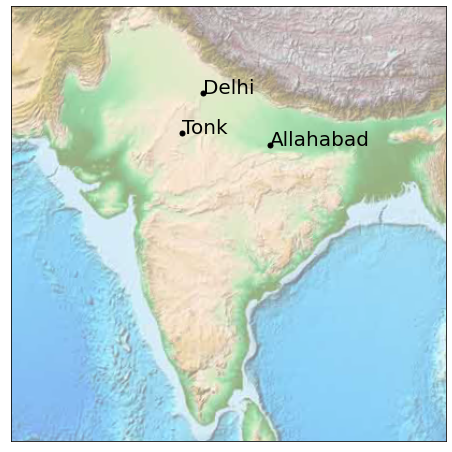

In [ ]:
number = "9"
year = "1950"
string = "SupremeCourt_" + year + "_" + number + "_judgements.txt"
get_the_map_of_the_given_case(string)

Annotating the names of the cities in the dataset

In [ ]:
cd ..

In [ ]:
df = pd.read_csv (r'in.csv')

In [ ]:
cities = df['city']

In [ ]:
cd NLP_dataset/

In [ ]:
for filename in os.listdir('Judgement'):
    if filename.endswith('.txt') :
        all_places = []
        file_ = os.path.join('Judgement', filename)
        with open(file_, 'r') as f:
            content = f.read()
            content1 = content.replace('-', '')
            content2 = content1.replace(' -', '')
            content3 = content2.replace('- ', '')
            case = spacy_nlp(content3)
            for element in case.ents:
              #print('Type: %s, Value: %s' % (element.label_, element))
              if element.label_ == "GPE":
                all_places.append(element.text)

            all_places_unique = unique(all_places)
            req_places = set(all_places_unique) & set(cities)

            new_file_content = ""
            content4 = nltk.tokenize.sent_tokenize(content3)
            for line in content4:
              words = nltk.tokenize.word_tokenize(line)
              for word in words:
                if(word in req_places):
                  annotated = "<City>" + word + "</City>" + " "
                  new_file_content = new_file_content + annotated
                else :
                  new_file_content = new_file_content + word + " "
              new_file_content = new_file_content + "\n"
            f.close()   

        writing_file = open(file_, "w")
        writing_file.write(new_file_content)
        writing_file.close() 


            


Annotating the respondents and appellants

In [ ]:
cd NLP_dataset

[Errno 2] No such file or directory: 'NLP_dataset'
/content/drive/My Drive/NLP_dataset


In [ ]:
cd

/root


In [ ]:
cd '/content/drive/My Drive/NLP_dataset'


/content/drive/My Drive/NLP_dataset


In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
for filename in os.listdir('Judgement'):
    if filename.endswith('.txt') :
        file_ = os.path.join('Judgement', filename)
        with open(file_, 'r') as f:
            content = f.read()
            content1 = content.replace('-', '')
            content2 = content1.replace(' -', '')
            content3 = content2.replace('- ', '')
            content4 = content3.replace(' .', ". ")
            content5 = nltk.tokenize.sent_tokenize(content4)

            new_file_content = ""
            for line in content5:
              #print(line)
              if line.endswith("for the petitioner."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<petitioner>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</petitioner>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the opposite party."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<opposite party>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</opposite party>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              

              elif line.endswith("for the respond ent."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<respondent>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</respondent>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the Respondent."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<respondent>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</respondent>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the respondent."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<respondent>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</respondent>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for Respondent No."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<respondent>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</respondent>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for respondent No."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<respondent>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</respondent>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for respondent Nos."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<respondent>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</respondent>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)


              elif line.endswith("for the respond ents."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<respondent>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</respondent>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the respondent in both the appeals."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<respondent>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</respondent>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the respondent in both appeals."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<respondent>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</respondent>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the respondents."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<respondent>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</respondent>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the respondents ."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<respondent>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</respondent>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the Caveator."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<Caveator>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</Caveator>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the Intervener."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<Intervener>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</Intervener>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the plaintiff."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<plaintiff>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</plaintiff>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the defendant."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<defendant>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</defendant>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)
              
              elif line.endswith("for the petitioner."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<petitioner>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</petitioner>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)



              elif line.endswith("for the opposite party."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<opposite party>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</opposite party>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              
              elif line.endswith("for the petition er."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<petitioner>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</petitioner>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the appel- lant."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<appellant>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</appellant>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the appellant."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<appellant>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</appellant>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the appel lant."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<appellant>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</appellant>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the Appellant."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<appellant>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</appellant>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the appellants."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<appellant>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</appellant>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the appel lants."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<appellant>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</appellant>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the Appellants."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<appellant>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</appellant>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the appellant in both the appeals ."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<appellant>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</appellant>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)

              elif line.endswith("for the appellant in both appeals."):
                doc = nlp(line)
                string = ""
                count = 0
                
                for X in doc:
                  if(X.ent_type_ == "PERSON" and count == 0):
                    string = string + "<appellant>" + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ == "PERSON" and count != 0):
                    string = string  + str(X.text) + " "
                    count = count + 1
                  elif(X.ent_type_ != "PERSON" and count !=0):
                    string = string + "</appellant>" + str(X.text) + " "
                    count = 0
                  else:
                    string = string + str(X.text) + " "

                new_file_content = new_file_content + string + " "
                
                print(string)


              else :
                new_file_content = new_file_content + line + '\n'
              



              

              
              
            f.close()   

        writing_file = open(file_, "w")
        writing_file.write(new_file_content)
        writing_file.close()

